<a href="https://colab.research.google.com/github/TiaPhan/Housing-Price/blob/main/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Clean**

In [ ]:
### Download data from web
### !wget https://archive.ics.uci.edu/ml/datasets/Online+Retail+II.xlsx

In [3]:
sheet1=pd.read_excel('/content/online_retail_II.xlsx',sheet_name='Year 2010-2011')
sheet2=pd.read_excel('/content/online_retail_II.xlsx',sheet_name='Year 2009-2010')
all=pd.concat([sheet1,sheet2])

In [13]:
all.shape

(1067371, 8)

### **Check for null**

In [4]:
all.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [6]:
nan_df=all[all.isna().any(axis=1)]
nan_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


###**Choose quantity>0 only**

In [15]:
all=all[(all['Quantity']>0)]

###**Delete null**

In [5]:
all=all.dropna(how='any')
all.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

### **Drop rows where prices=0**

In [8]:
all=all.drop(all[all.Price==0.00].index)

In [36]:
all.shape

(824236, 13)

In [37]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824236 entries, 0 to 525460
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      824236 non-null  object 
 1   StockCode    824236 non-null  object 
 2   Description  824236 non-null  object 
 3   Quantity     824236 non-null  int64  
 4   InvoiceDate  824236 non-null  object 
 5   Price        824236 non-null  float64
 6   Customer ID  824236 non-null  float64
 7   Country      824236 non-null  object 
 8   Sales        824236 non-null  float64
 9   Year         824236 non-null  int64  
 10  Month        824236 non-null  int64  
 11  Hour         824236 non-null  int64  
 12  Day          824236 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 88.0+ MB


###**Create column Sales**

In [6]:
all['Sales']=all['Quantity']*all['Price']

### **Create column Year**

In [7]:
all['Year']=all['InvoiceDate'].dt.year

### **Create column Month**

We need to add x.strftime('%Y-%m-%d)before split because we can't apply split on datetime type data

In [9]:
#all['Month']=all['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m-%d').split('-')[1])
all['Month']=all['InvoiceDate'].dt.month

###**Create column Date**

In [12]:
all['InvoiceDate']=all['InvoiceDate'].dt.date

In [11]:
all['Day']=all['InvoiceDate'].dt.day

### **Create column Hour**

In [10]:
all["Hour"]=all['InvoiceDate'].dt.hour

In [13]:
all.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Year,Month,Hour,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,2010,12,8,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010,12,8,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,2010,12,8,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010,12,8,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010,12,8,1


##**Questions**

###**1. What countries have the highest number of sales?**

In [38]:
country_sales=all.groupby('Country').sum()
country_sales['Sales']=round(country_sales['Sales'],2)
country_sales

,Quantity,Price,Customer ID,Sales,Year,Month,Hour,Day
Country,,,,,,,,
Australia,103386,8109.820,2.383903e+07,167114.07,3838284,13142,22144,30376
Austria,11306,4184.320,1.172460e+07,23177.60,1885734,7225,11173,15777
Bahrain,755,170.510,7.288970e+05,1354.37,118607,395,719,1195
Belgium,35122,14766.880,3.886121e+07,63574.49,6277174,22604,38310,49699
Brazil,545,256.310,1.199170e+06,1411.87,188972,686,1064,1782
Canada,3657,1058.090,3.800513e+06,4883.04,458431,1760,2745,3787
Channel Islands,20473,9056.800,2.469156e+07,41453.61,3345338,12373,19246,25253
Cyprus,10688,6333.950,1.460694e+07,24162.74,2364103,8982,13607,15122
Czech Republic,592,88.150,3.834300e+05,707.72,60330,171,283,546


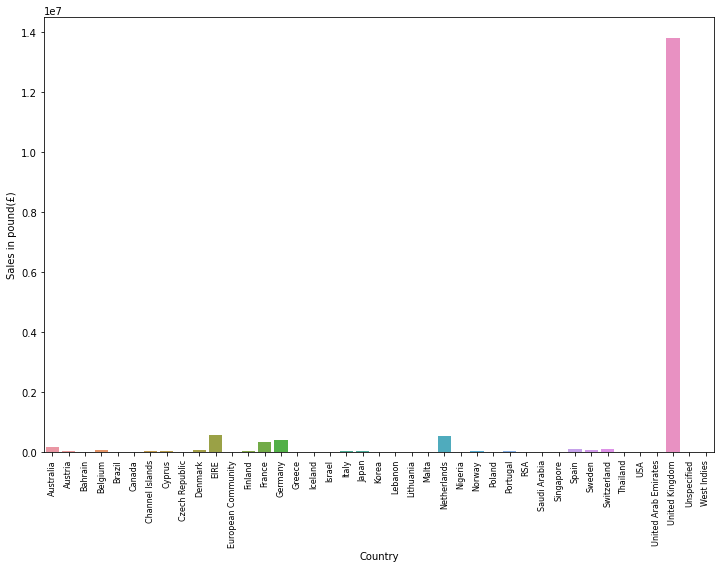

In [39]:
country_sales=all.groupby('Country').sum()
plt.figure(figsize=(12,8))
sns.barplot(country_sales.index,country_sales['Sales'])
plt.xticks(rotation='vertical',size=8)
plt.xlabel('Country')
plt.ylabel('Sales in pound(£)')
plt.show()

###**2. What time should we display advertisements to maximize likelihood of customer's buying product?** 

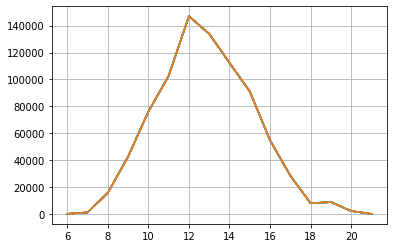

In [40]:
hours=[hour for hour,df in all.groupby('Hour')]
plt.plot(hours,all.groupby('Hour').count())
plt.grid()
plt.show()
#12pm would be the good time to display ads because those were the peaks of our data happened

###**3. Number of items sold per day?**

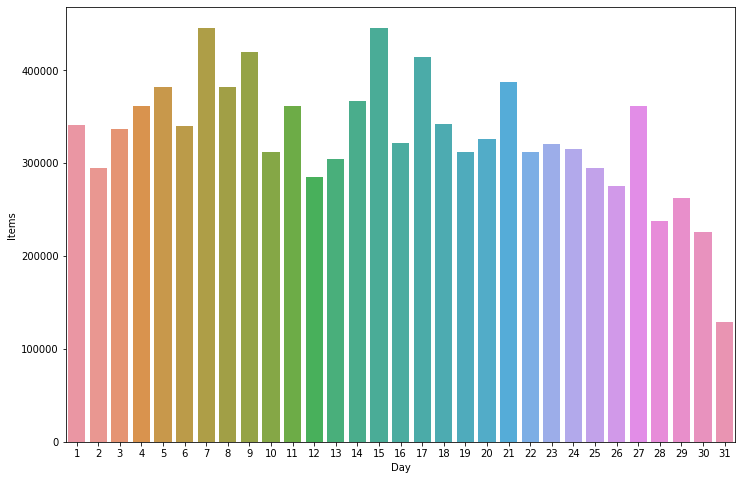

In [42]:
items_per_day=all.groupby('Day').sum()

plt.figure(figsize=(12,8))
sns.barplot(items_per_day.index,items_per_day['Quantity'])
plt.xlabel('Day')
plt.ylabel('Items')
plt.show()
#People went shopping every 9 days

###**4. What was the best month for sales?**

In [43]:
month_sales=all.groupby('Month').sum()
month_sales

,Quantity,Price,Customer ID,Sales,Year,Hour,Day
Month,,,,,,,
1,636411,178540.382,6.740136e+08,1007004.482,89145307,567158,795291
2,629112,149027.676,6.749114e+08,925935.536,88993011,560701,650715
3,842993,279006.221,9.318544e+08,1215924.641,122499130,770229,1010063
4,624126,205323.343,7.797339e+08,986639.563,102577413,647488,820638
5,737482,224623.330,8.926831e+08,1208162.190,117629986,740540,919759
6,733149,274431.210,9.177900e+08,1179469.770,120189655,757248,904896
7,682909,198147.471,8.462566e+08,1136970.331,111059898,703184,892573
8,832428,178177.660,8.371818e+08,1203178.760,109755565,702518,844524
9,1010925,265975.773,1.164370e+09,1709655.623,153198797,978001,1318017


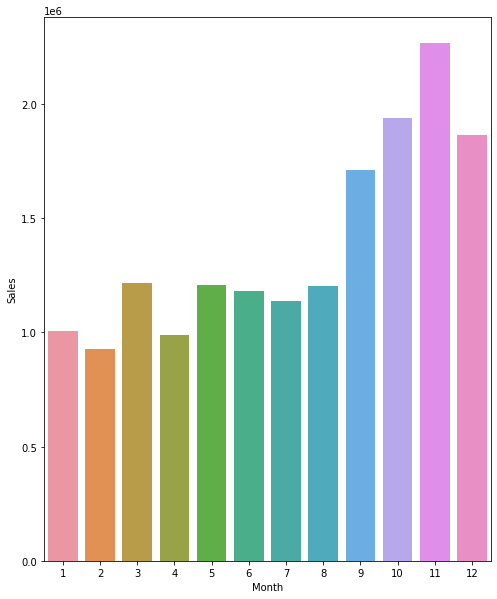

In [44]:
month=all.groupby('Month').sum()
plt.figure(figsize=(8,10))
sns.barplot(month.index,month['Sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

#October and November would be good times for a sales campaign.

The reason sales increased in November maybe because people prepared for Christmas.

###**5. Average revenue per order?**

In [45]:
monthly_order=all.groupby('Month').mean()['Sales']
monthly_order
# In November even though the number of order is high, but price per order is low, which lead to the low average revenue per order. 
# December and January have the highest sales, let's figure out what people usually buy in these two months.

Month
1     22.710972
2     20.918006
3     19.955764
4     19.337532
5     20.649521
6     19.729513
7     20.582374
8     22.039874
9     22.437014
10    19.155825
11    17.844022
12    20.481181
Name: Sales, dtype: float64

###**6.Check why November had the high sales volumn but low average revenue per order?**

The hottest item in November is 12 pencil small tube woodland which costs 0.65 for one, which the best sales item in December is 3 STRIPEY MICE FELTCRAFT, which costs 1.95 for one.  

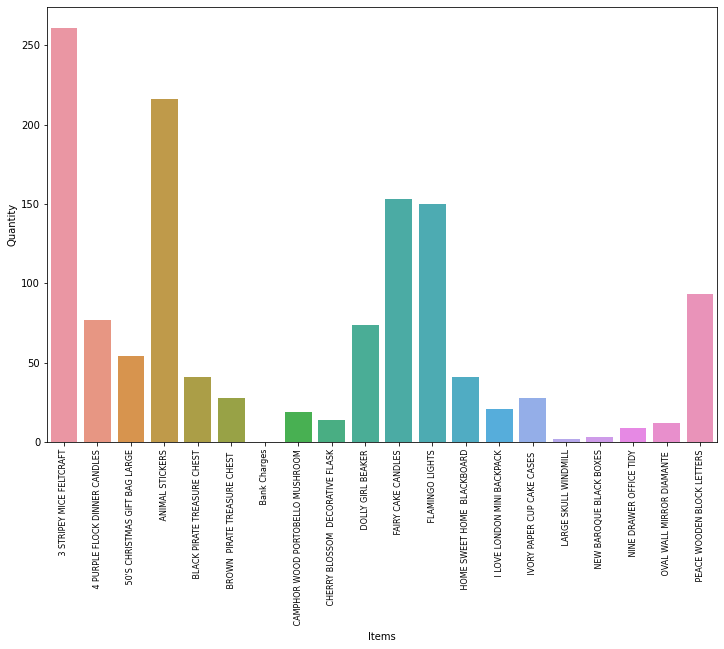

In [46]:
dec=all[all['Month']==12]
dec_hot_items=dec.groupby('Description').sum().head(20)

plt.figure(figsize=(12,8))
sns.barplot(dec_hot_items.index,dec_hot_items['Quantity'])

plt.xlabel('Items')
plt.ylabel('Quantity')
plt.xticks(rotation='vertical',size=8)
plt.show()

In [47]:
nov=all[all['Month']==11]

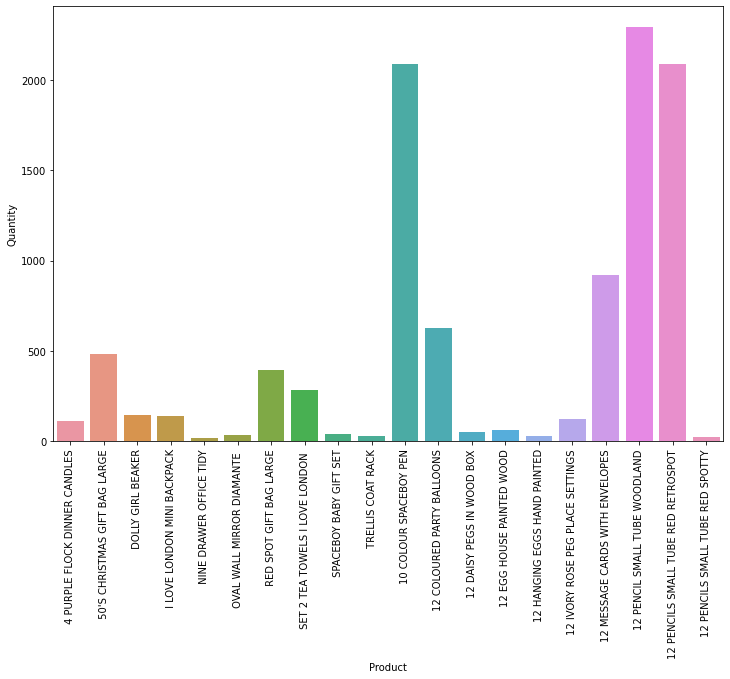

In [48]:
nov_best=nov.groupby('Description').sum().head(20)
plt.figure(figsize=(12,8))
sns.barplot(nov_best.index,nov_best['Quantity'].head(20))
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.xticks(rotation='vertical')
plt.show()

In [49]:
nov[nov['Description']=='12 PENCIL SMALL TUBE WOODLAND']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Year,Month,Hour,Day
432080,573814,20973,12 PENCIL SMALL TUBE WOODLAND,2,2011-11-01,0.65,13268.0,United Kingdom,1.30,2011,11,11,1
432306,573868,20973,12 PENCIL SMALL TUBE WOODLAND,24,2011-11-01,0.65,12491.0,France,15.60,2011,11,12,1
432331,573868,20973,12 PENCIL SMALL TUBE WOODLAND,72,2011-11-01,0.65,12491.0,France,46.80,2011,11,12,1
432521,573876,20973,12 PENCIL SMALL TUBE WOODLAND,1,2011-11-01,0.65,16360.0,United Kingdom,0.65,2011,11,12,1
433121,573904,20973,12 PENCIL SMALL TUBE WOODLAND,4,2011-11-01,0.65,14505.0,United Kingdom,2.60,2011,11,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495626,535791,20973,12 PENCIL SMALL TUBE WOODLAND,4,2010-11-28,0.65,13230.0,United Kingdom,2.60,2010,11,14,28
498329,535967,20973,12 PENCIL SMALL TUBE WOODLAND,12,2010-11-29,0.65,14510.0,United Kingdom,7.80,2010,11,12,29
498346,535974,20973,12 PENCIL SMALL TUBE WOODLAND,4,2010-11-29,0.65,16413.0,United Kingdom,2.60,2010,11,12,29
499021,536006,20973,12 PENCIL SMALL TUBE WOODLAND,5,2010-11-29,0.65,17019.0,United Kingdom,3.25,2010,11,14,29


In [50]:
dec[dec['Description']=='3 STRIPEY MICE FELTCRAFT']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Year,Month,Hour,Day
242,536392,22150,3 STRIPEY MICE FELTCRAFT,6,2010-12-01,1.95,13705.0,United Kingdom,11.70,2010,12,10,1
914,536488,22150,3 STRIPEY MICE FELTCRAFT,1,2010-12-01,1.95,17897.0,United Kingdom,1.95,2010,12,12,1
1411,536540,22150,3 STRIPEY MICE FELTCRAFT,12,2010-12-01,1.95,14911.0,EIRE,23.40,2010,12,14,1
4240,536754,22150,3 STRIPEY MICE FELTCRAFT,2,2010-12-02,1.95,14449.0,United Kingdom,3.90,2010,12,14,2
7119,536989,22150,3 STRIPEY MICE FELTCRAFT,1,2010-12-03,1.95,17238.0,United Kingdom,1.95,2010,12,15,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
520636,537773,22150,3 STRIPEY MICE FELTCRAFT,2,2010-12-08,1.95,16016.0,United Kingdom,3.90,2010,12,12,8
522587,537880,22150,3 STRIPEY MICE FELTCRAFT,12,2010-12-09,1.95,12963.0,United Kingdom,23.40,2010,12,9,9
522642,537886,22150,3 STRIPEY MICE FELTCRAFT,6,2010-12-09,1.95,15660.0,United Kingdom,11.70,2010,12,9,9
522689,537888,22150,3 STRIPEY MICE FELTCRAFT,6,2010-12-09,1.95,15358.0,United Kingdom,11.70,2010,12,10,9


###**7. New customer ratio?**

For United Kingdom

In [51]:
uk=all[all['Country']=='United Kingdom']
uk

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Year,Month,Hour,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,2010,12,8,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010,12,8,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,2010,12,8,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010,12,8,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010,12,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09,2.95,17530.0,United Kingdom,5.90,2010,12,20,9
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09,3.75,17530.0,United Kingdom,3.75,2010,12,20,9
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09,3.75,17530.0,United Kingdom,3.75,2010,12,20,9
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09,3.75,17530.0,United Kingdom,7.50,2010,12,20,9


In [57]:
min_purchase=uk.groupby('Customer ID').min()['InvoiceDate'].reset_index()
min_purchase.columns=['Customer ID','MinPurchaseDate']
min_purchase['MinPurchaseYearMonth']=min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year+date.month )
min_purchase


,Customer ID,MinPurchaseDate,MinPurchaseYearMonth
0,12346.0,2009-12-14,200912
1,12608.0,2010-10-31,201010
2,12745.0,2010-05-14,201005
3,12746.0,2009-12-08,200912
4,12747.0,2009-12-07,200912
...,...,...,...
5402,18283.0,2010-02-19,201002
5403,18284.0,2010-10-04,201010
5404,18285.0,2010-02-17,201002
5405,18286.0,2009-12-16,200912


In [75]:
uk['InvoiceYearMonth']=uk['InvoiceDate'].map(lambda date: 100*date.year+date.month)

In [76]:
retention=pd.merge(uk,min_purchase, on='Customer ID')
retention

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Year,Month,Hour,Day,InvoiceYearMonth,MinPurchaseDate,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,2010,12,8,1,201012,2009-12-05,200912
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010,12,8,1,201012,2009-12-05,200912
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,2010,12,8,1,201012,2009-12-05,200912
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010,12,8,1,201012,2009-12-05,200912
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010,12,8,1,201012,2009-12-05,200912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741201,536207,47566,PARTY BUNTING,1,2010-11-30,4.65,17826.0,United Kingdom,4.65,2010,11,13,30,201011,2010-11-30,201011
741202,536207,22988,SOLDIERS EGG CUP,2,2010-11-30,1.25,17826.0,United Kingdom,2.50,2010,11,13,30,201011,2010-11-30,201011
741203,536207,85135B,BLUE DRAGONFLY HELICOPTER,1,2010-11-30,7.95,17826.0,United Kingdom,7.95,2010,11,13,30,201011,2010-11-30,201011
741204,C536265,21843,RED RETROSPOT CAKE STAND,-1,2010-11-30,10.95,17378.0,United Kingdom,-10.95,2010,11,15,30,201011,2010-11-30,201011


In [77]:
retention['UserType']='New'
retention.loc[retention['InvoiceDate']>retention['MinPurchaseDate'],'UserType']='Existing'
retention

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Year,Month,Hour,Day,InvoiceYearMonth,MinPurchaseDate,MinPurchaseYearMonth,UserType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,2010,12,8,1,201012,2009-12-05,200912,Existing
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010,12,8,1,201012,2009-12-05,200912,Existing
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,2010,12,8,1,201012,2009-12-05,200912,Existing
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010,12,8,1,201012,2009-12-05,200912,Existing
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010,12,8,1,201012,2009-12-05,200912,Existing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741201,536207,47566,PARTY BUNTING,1,2010-11-30,4.65,17826.0,United Kingdom,4.65,2010,11,13,30,201011,2010-11-30,201011,New
741202,536207,22988,SOLDIERS EGG CUP,2,2010-11-30,1.25,17826.0,United Kingdom,2.50,2010,11,13,30,201011,2010-11-30,201011,New
741203,536207,85135B,BLUE DRAGONFLY HELICOPTER,1,2010-11-30,7.95,17826.0,United Kingdom,7.95,2010,11,13,30,201011,2010-11-30,201011,New
741204,C536265,21843,RED RETROSPOT CAKE STAND,-1,2010-11-30,10.95,17378.0,United Kingdom,-10.95,2010,11,15,30,201011,2010-11-30,201011,New


In [78]:
usertype_sales=retention.groupby(['UserType','InvoiceYearMonth']).sum()['Sales'].reset_index()
usertype_sales


,UserType,InvoiceYearMonth,Sales
0,Existing,200912,231129.550
1,Existing,201001,280041.901
2,Existing,201002,269651.423
3,Existing,201003,413357.760
4,Existing,201004,393613.111
5,Existing,201005,384673.420
6,Existing,201006,413060.240
7,Existing,201007,433954.570
8,Existing,201008,444948.290
9,Existing,201009,516481.491


###**8. Monthly customer retention rate?**

In [79]:
user_rate=retention[retention['UserType']=='New'].groupby('InvoiceYearMonth').nunique()['Customer ID']/retention[retention['UserType']=='Existing'].groupby("InvoiceYearMonth").nunique()['Customer ID']

In [80]:
user_rate=user_rate.dropna(how='any')
user_rate.reset_index()
user_rate

InvoiceYearMonth
200912    3.120253
201001    0.835714
201002    0.729075
201003    0.583931
201004    0.378031
201005    0.295828
201006    0.305795
201007    0.206410
201008    0.185422
201009    0.242024
201010    0.294574
201011    0.230534
201012    0.079657
201101    0.098726
201102    0.174194
201103    0.206853
201104    0.124830
201105    0.104626
201106    0.108295
201107    0.109622
201108    0.107905
201109    0.161383
201110    0.173642
201111    0.125178
201112    0.035235
Name: Customer ID, dtype: float64

In [103]:
user_rate=pd.DataFrame(user_rate)
user_rate['NewUserRate']=user_rate['Customer ID']
user_rate.drop('Customer ID',axis=1, inplace=True)
user_rate


KeyError: ignored

In [105]:
user_rate.reset_index().head()

,InvoiceYearMonth,NewUserRate
0,200912,3.120253
1,201001,0.835714
2,201002,0.729075
3,201003,0.583931
4,201004,0.378031


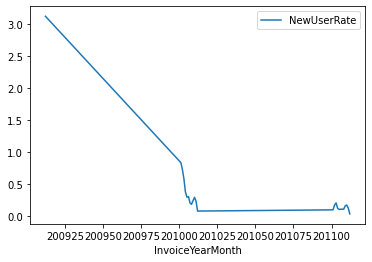

In [109]:
user_rate.plot(kind='line')
plt.show()

##**Models**

**5. What products are often sold together?**

In [55]:
df=all[all['Invoice'].duplicated(keep=False)]
df['Grouped']=df.groupby('Invoice')['Description'].transform(lambda x: ','.join(x))
df1=df[['Invoice','Grouped']].drop_duplicates()
df1.head()

,Invoice,Grouped
0,536365,"WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL..."
7,536366,"HAND WARMER UNION JACK,HAND WARMER RED POLKA D..."
9,536368,"JAM MAKING SET WITH JARS,RED COAT RACK PARIS F..."
13,536367,"ASSORTED COLOUR BIRD ORNAMENT,POPPY'S PLAYHOUS..."
25,536369,"BATH BUILDING BLOCK WORD,BATH BUILDING BLOCK WORD"


In [110]:
from itertools import combinations
from collections import Counter

count=Counter()
for row in df['Grouped']:
  row_list=row.split(',')
  count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
  print(key,value)

('KEY FOB ', 'KEY FOB ') 170630
('KEY FOB ', ' BACK DOOR ') 95579
('FRENCH BLUE METAL DOOR SIGN', 'FRENCH BLUE METAL DOOR SIGN') 89943
('KEY FOB ', ' SHED') 86914
('KEY FOB ', ' FRONT  DOOR ') 65027
('KEY FOB ', ' GARAGE DESIGN') 59985
(' BACK DOOR ', 'KEY FOB ') 50968
(' SHED', 'KEY FOB ') 47010
('KEY FOB ', 'WHITE HANGING HEART T-LIGHT HOLDER') 42642
(' GARAGE DESIGN', 'KEY FOB ') 40798


Text(0, 0.5, 'Quantity')

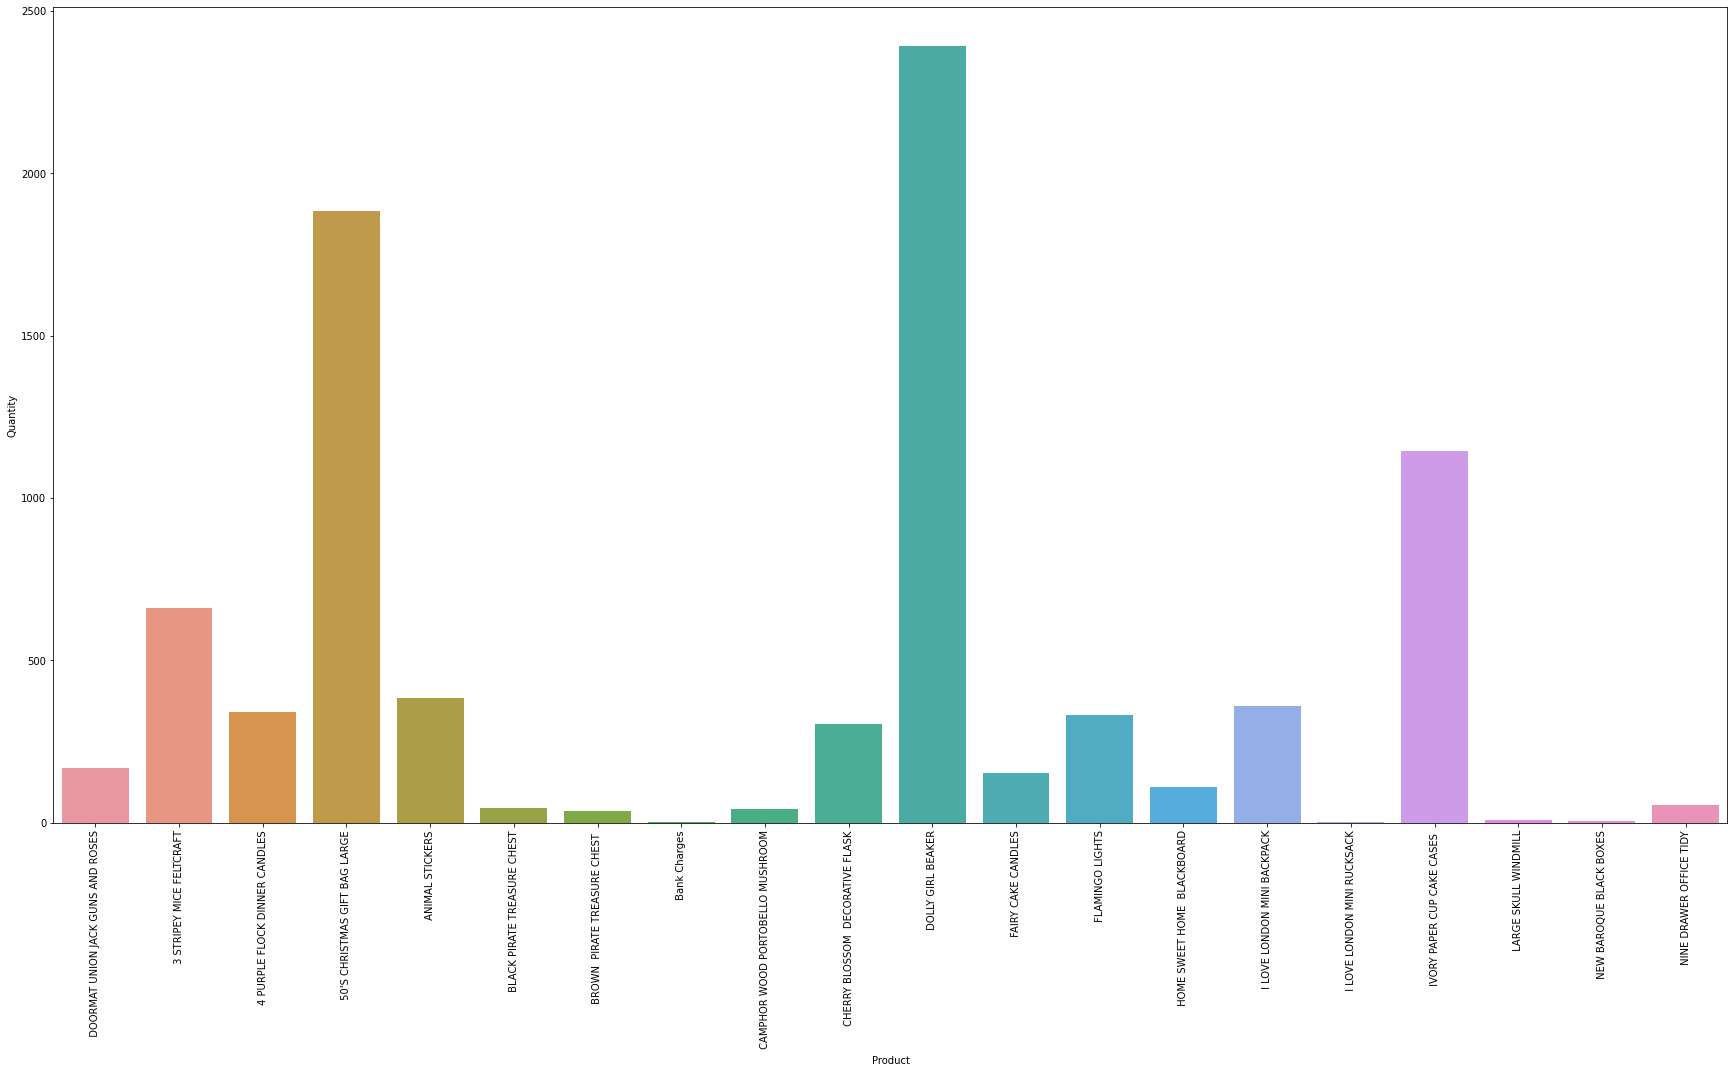

In [112]:
product=all.groupby('Description').sum().head(20)


plt.figure(figsize=(30,15))
sns.barplot(product.index,product['Quantity'])
plt.xticks(rotation='vertical',size=10)
plt.xlabel('Product')
plt.ylabel('Quantity')

#Most consumed products are Dolly Girl Breaker, 50's Christmas Gift Bag Large, Ivory Paper Cup Cake Cases

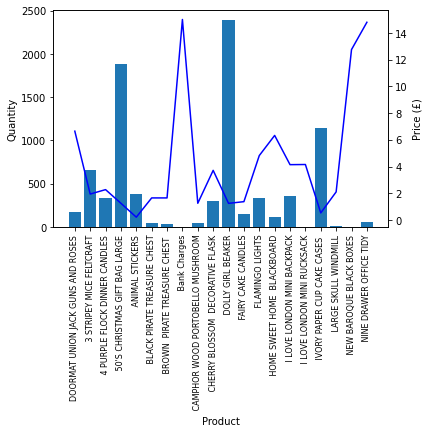

In [113]:
prices=all.groupby('Description').mean()['Price'].head(20)

fig,ax1=plt.subplots()

ax2=ax1.twinx()
ax1.bar(product.index,product['Quantity'])
ax2.plot(product.index,prices,'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity')
ax2.set_ylabel('Price (£)')

ax1.set_xticklabels(product.index,rotation='vertical',size=8)

plt.show()

#Products with prices under £2 seemed to sell well.

## **Apriori Algorithm**

In [ ]:
all['Invoice']=all['Invoice'].astype('str')
all=all[~all['Invoice'].str.contains('C')]

In [ ]:
basket=(all[all['Country']=='United Kingdom']
        .groupby(['Invoice','Description'])['Quantity']
        .sum().unstack().reset_index().fillna(0)
        .set_index('Invoice'))

basket.head()

In [ ]:
def encode_units(x):
  if x<=0:
    return 0
  if x >=1 :
    return 1

basket_sets=basket.applymap(encode_units)
basket_sets

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [ ]:
frequent_itemsets=apriori(basket_sets,min_support=0.05,use_colnames=True)
print(frequent_itemsets)

rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.head()

## **Customer Lifetime Value**

To understand whther a customer is active or inactive

In [17]:
cols_of_interest=['Customer ID','InvoiceDate','Sales']
all1=all[cols_of_interest]
print(all1.head())
print(all1['Customer ID'].nunique())

   Customer ID InvoiceDate  Sales
0      17850.0  2010-12-01  15.30
1      17850.0  2010-12-01  20.34
2      17850.0  2010-12-01  22.00
3      17850.0  2010-12-01  20.34
4      17850.0  2010-12-01  20.34
5939


In [32]:
!pip install Lifetimes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 584 kB 20.5 MB/s 


In [15]:
from lifetimes.utils import summary_data_from_transaction_data

In [20]:
last_order_date=all['InvoiceDate'].max()
last_order_date

datetime.date(2011, 12, 9)

In [21]:
df=summary_data_from_transaction_data(all1, 'Customer ID','InvoiceDate',monetary_value_col='Sales',observation_period_end='2011-12-09')
df.reset_index().head()

,Customer ID,frequency,recency,T,monetary_value
0,12346.0,10.0,400.0,725.0,-15.468000
1,12347.0,7.0,402.0,404.0,717.398571
2,12348.0,4.0,363.0,438.0,449.310000
3,12349.0,4.0,717.0,735.0,1107.172500
4,12350.0,0.0,0.0,310.0,0.000000


Percentage of one time buyer 25.9 %


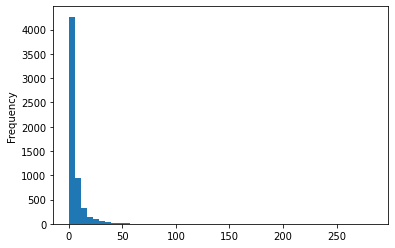

In [26]:
df['frequency'].plot(kind='hist',bins=50)
one_time_buyers=round(sum(df['frequency']==0)/float(len(df))*100,1)
print('Percentage of one time buyer', one_time_buyers, '%')

In [27]:
#Frequency/Recency Analysis using BG/NBD model
from lifetimes import BetaGeoFitter
bgnbd=BetaGeoFitter()
bgnbd.fit(df['frequency'],df['recency'],df['T'])
print(bgnbd)

<lifetimes.BetaGeoFitter: fitted with 5939 subjects, a: 0.15, alpha: 49.99, b: 2.11, r: 0.67>


/usr/local/lib/python3.7/dist-packages/lifetimes/fitters/beta_geo_fitter.py:256: RuntimeWarning: overflow encountered in double_scalars
  denominator = 1 + (x > 0) * (a / (b + x - 1)) * ((alpha + T) / (alpha + recency)) ** (r + x)


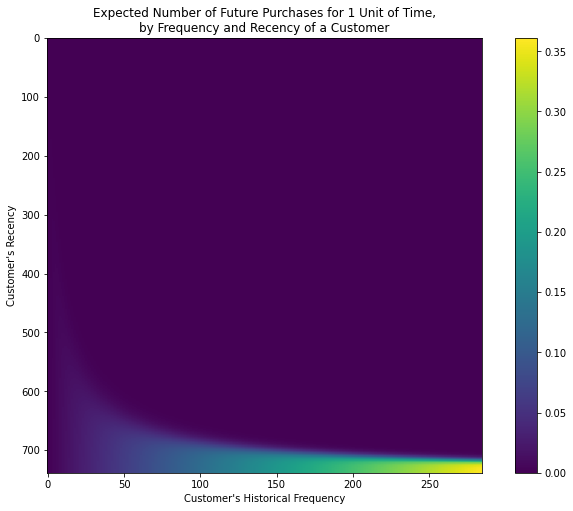

In [28]:
from lifetimes.plotting import plot_frequency_recency_matrix
plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgnbd)
# 250 purchases in 700 days from the first purchase is the best customer

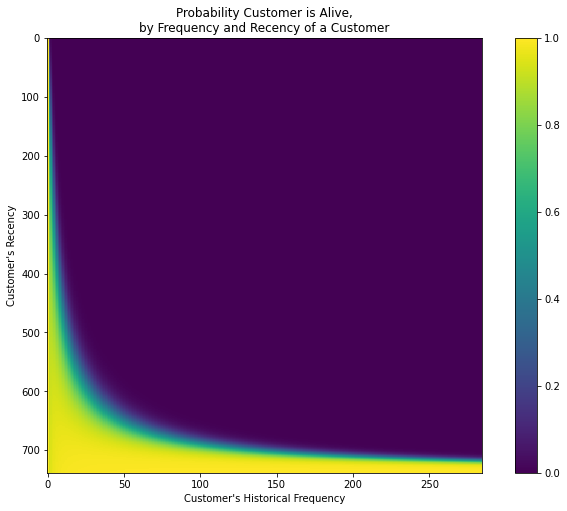

In [29]:
from lifetimes.plotting import plot_probability_alive_matrix
plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgnbd)
## Customers who have purchased recently is still 'alive'. Customers who have purchase a lot but not frequently are likely 
##to have dropped out. Customers whose recency are less than 500 days are likely to have been inactive.

In [32]:
t=90
df['pred_purchases']=bgnbd.conditional_expected_number_of_purchases_up_to_time(t,df['frequency'],df['recency'],df['T'])
df.sort_values(by='pred_purchases').tail(10)

,frequency,recency,T,monetary_value,pred_purchases
Customer ID,,,,,
13798.0,101.0,730.0,731.0,723.658119,11.603759
16422.0,118.0,721.0,738.0,517.921949,13.231262
14527.0,135.0,735.0,737.0,184.079630,15.368698
14156.0,147.0,729.0,738.0,2010.120340,16.643009
13089.0,161.0,735.0,737.0,700.907391,18.316746
14606.0,181.0,735.0,736.0,165.079448,20.615779
17841.0,193.0,736.0,737.0,357.418031,21.950846
15311.0,201.0,738.0,738.0,560.647015,22.834228
12748.0,206.0,735.0,735.0,241.423447,23.489495


Customer ID 14911 who has made 284 purchases, and bought very recently is expected to spend 23 pound. Customers who have made more than 100 purchases, and bought recently are expected to come back.

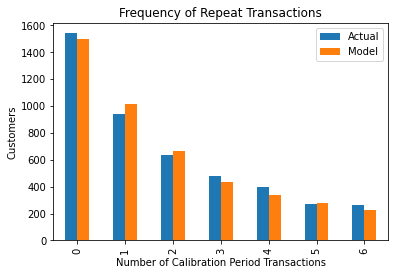

In [34]:
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgnbd)
## The model is a very good fit and predicts the number of calibration period transactions pretty well. 
## For each of 6 repeat purchases of customer in the future, we both plot that the model predicts and what the actual numbers were.
## We can observe that there is just a little error in the fit for up to top 6 purchases. 

In [35]:
t=10
individual=df.loc[12745]
bgnbd.predict(t,individual['frequency'],individual['recency'],individual['T'])

0.019599062904221188